In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
X, y=make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.5, random_state=42)

In [3]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Text(0, 0.5, 'fea2')

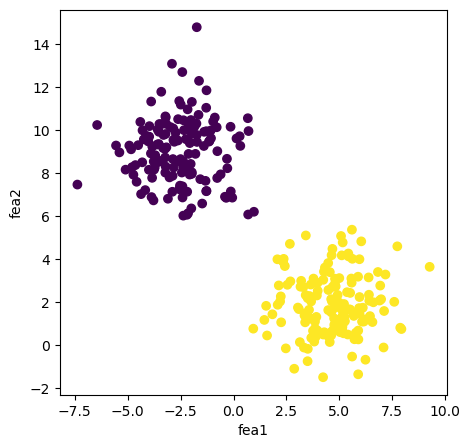

In [57]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('fea1')
plt.ylabel('fea2')

In [112]:
C_values = [0.000000000000000000000001, 0.0000001, 0.00001, 100, 1000000]
models = []
accuracies = []
C=0.000000000000000000000000000000001

In [113]:
for i in range (15):
    model=LinearSVC(C=C)
    model.fit(X_train, y_train)
    models.append(model)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    C=C*1000

In [114]:
print(models)
print(accuracies)

[LinearSVC(C=1e-33), LinearSVC(C=1e-30), LinearSVC(C=1e-27), LinearSVC(C=1.0000000000000001e-24), LinearSVC(C=1.0000000000000001e-21), LinearSVC(C=1e-18), LinearSVC(C=1e-15), LinearSVC(C=1e-12), LinearSVC(C=1e-09), LinearSVC(C=1.0000000000000002e-06), LinearSVC(C=0.0010000000000000002), LinearSVC(C=1.0000000000000002), LinearSVC(C=1000.0000000000002), LinearSVC(C=1000000.0000000002), LinearSVC(C=1000000000.0000002)]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0]


In [184]:
iris = load_iris()
X=iris.data[:, :2]
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, stratify=y)
models=[]
results=[]
model=SVC(kernel='rbf', gamma='scale', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"accuracy:{accuracy}, precision:{precision}, recall: {recall}")

accuracy:0.9, precision:0.925, recall: 0.9


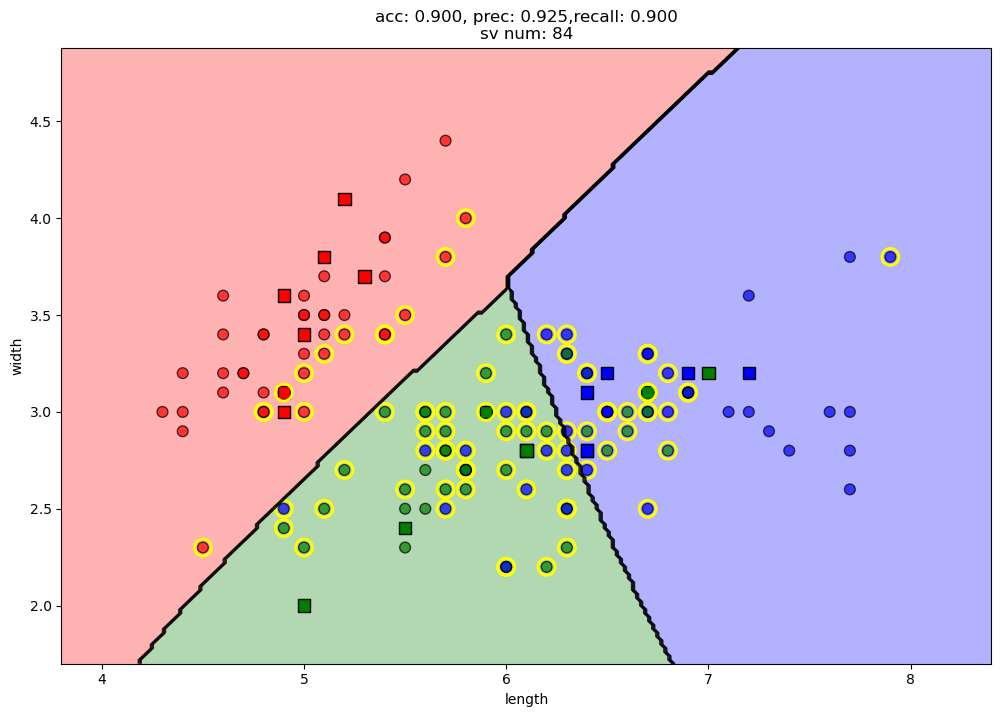

In [200]:
def plot_svm_decision_boundary(model, X_train, y_train, X_test, y_test, title):
    plt.figure(figsize=(12, 8))
    h = 0.02 
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['r', 'g', 'b']))
    plt.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.8)
    scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                               cmap=ListedColormap(['r', 'g', 'b']),
                               alpha=0.7, edgecolors='k', s=60, label='train', marker='o')
    scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
                              cmap=ListedColormap(['r', 'g', 'b']),
                              alpha=1.0, edgecolors='k', s=80, label='test', marker='s')
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                facecolors='none', edgecolors='yellow', 
                s=150, linewidths=2, label='svm')
    plt.xlabel('length')
    plt.ylabel('width')
    plt.title(title)
    plt.show()
title = (f"acc: {accuracy:.3f}, prec: {precision:.3f},recall: {recall:.3f}\n"
         f"sv num: {len(model.support_vectors_)}")
plot_svm_decision_boundary(model, X_train, y_train, X_test, y_test, title)